# Cortex Hebbian

In [12]:
from pylissom.optim.optimizers import *
import torch
from pylissom.nn.modules.lissom import *
from pylissom.utils.plotting import *
from pylissom.utils.stimuli import *
import matplotlib.pyplot as plt


In [7]:
in_features = 25**2
out_features = 25**2
cortex = Cortex(in_features, out_features, radius=5, sigma=5)

In [8]:
optimizer = CortexHebbian(cortex, 0.1)

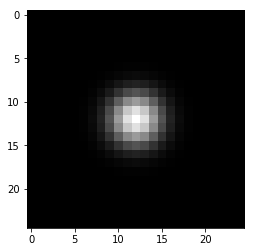

In [9]:
gauss_size = int(in_features**0.5)
gauss = gaussian_generator(gauss_size, gauss_size//2, gauss_size//2, 2, 2, 0)
plot_matrix(gauss)
inp = torch.autograd.Variable(torch.from_numpy(gauss).view(in_features)).unsqueeze(0)

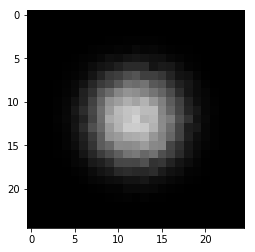

In [10]:
out_rows = int(out_features**0.5)
plot_tensor(cortex(inp*2.33).data, (out_rows,out_rows))

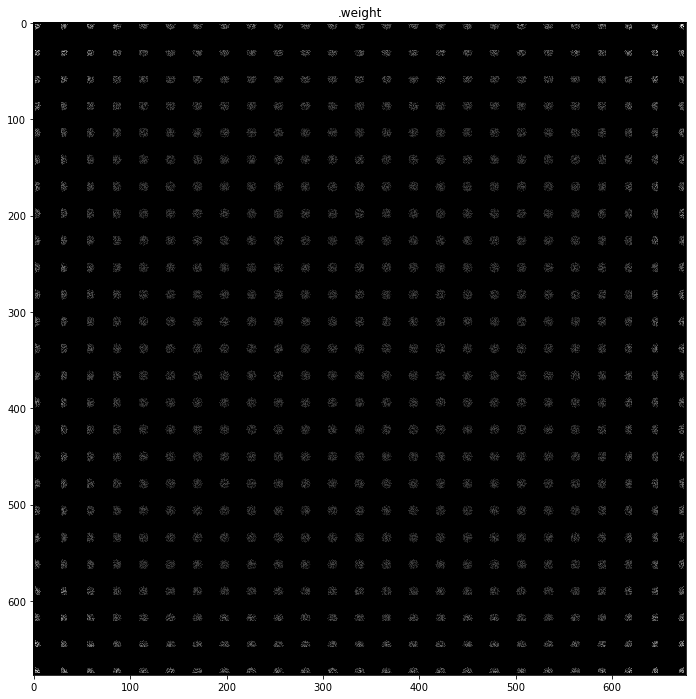

In [11]:
plt.figure(figsize=(12, 12))
plot_layer_weights(cortex, use_range=False)

In [13]:
optimizer.step()

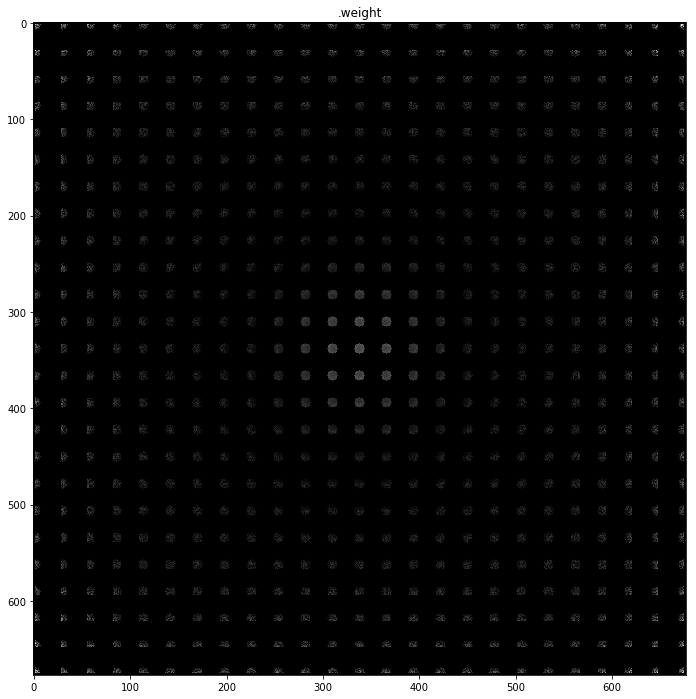

In [14]:
plt.figure(figsize=(12, 12))
plot_layer_weights(cortex, use_range=False)

# Sequential Optimizer

In [15]:
retinal_density = 36
lgn_density = retinal_density
cortical_density = 36
# Receptive Fields
radius_afferent = (lgn_density / 4 + 0.5)
radius_excitatory = (cortical_density / 10)
radius_inhibitory = cortical_density / 4 - 1
radius_gaussian_afferent = radius_afferent / 1.3
radius_gaussian_excitatory = 0.78 * radius_excitatory
radius_gaussian_inhibitory = 2.08 * radius_inhibitory
# Activation
settling_steps = 9
min_theta = 0.083
max_theta = min_theta + 0.55
# Scaling
afferent_factor = 1.0
excitatory_factor = 0.9
inhibitory_factor = 0.9

In [16]:
in_features = lgn_density**2
out_features = cortical_density**2
excitatory_map = Cortex(in_features, out_features, radius=radius_excitatory, sigma=radius_gaussian_excitatory)

In [17]:
in_features = cortical_density**2
out_features = cortical_density**2
afferent_map = Cortex(in_features, out_features, radius=radius_afferent, sigma=radius_gaussian_afferent)

In [18]:
in_features = cortical_density**2
out_features = cortical_density**2
inhibitory_map = Cortex(in_features, out_features, radius=radius_inhibitory, sigma=radius_gaussian_inhibitory)

In [19]:
v1 = ReducedLissom(afferent_module=afferent_map, excitatory_module=excitatory_map, inhibitory_module=inhibitory_map, 
                   min_theta=min_theta, max_theta=max_theta, settling_steps=settling_steps,
                  inhibitory_strength=inhibitory_factor, afferent_strength=afferent_factor, 
                   excitatory_strength=excitatory_factor)

In [20]:
excit_optimizer = CortexHebbian(excitatory_map, 0.5)
inhib_optimizer = CortexHebbian(inhibitory_map, 0.4)
aff_optimizer = CortexHebbian(afferent_map, 0.3)

In [21]:
seq = SequentialOptimizer(excit_optimizer, inhib_optimizer, aff_optimizer)

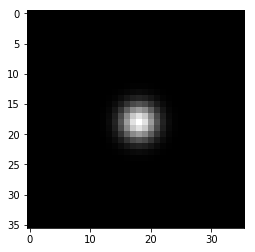

In [22]:
gauss_size = int(in_features**0.5)
gauss = gaussian_generator(gauss_size, gauss_size//2, gauss_size//2, 2, 2, 0)
plot_matrix(gauss)
inp = torch.autograd.Variable(torch.from_numpy(gauss).view(in_features)).unsqueeze(0)

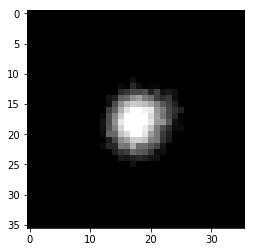

In [23]:
out_rows = int(out_features**0.5)
plot_tensor(v1(inp*2.33).data, (out_rows,out_rows))

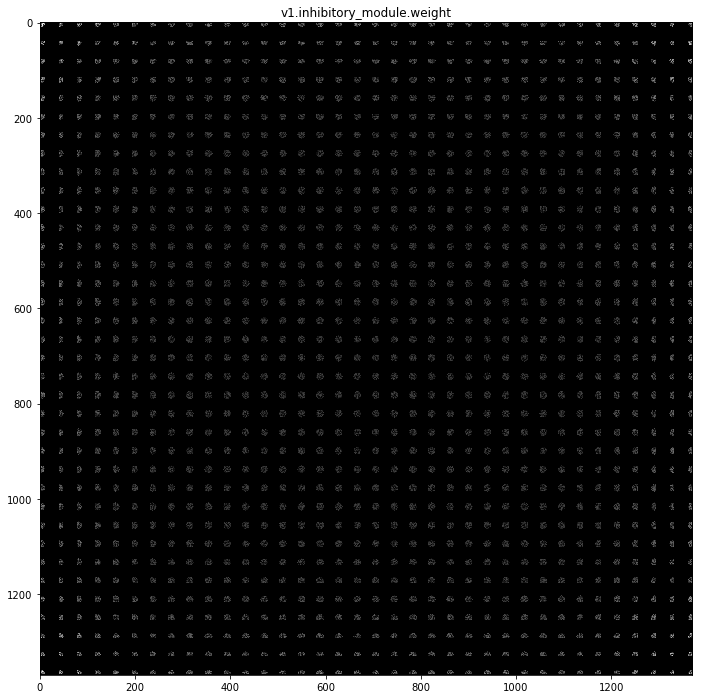

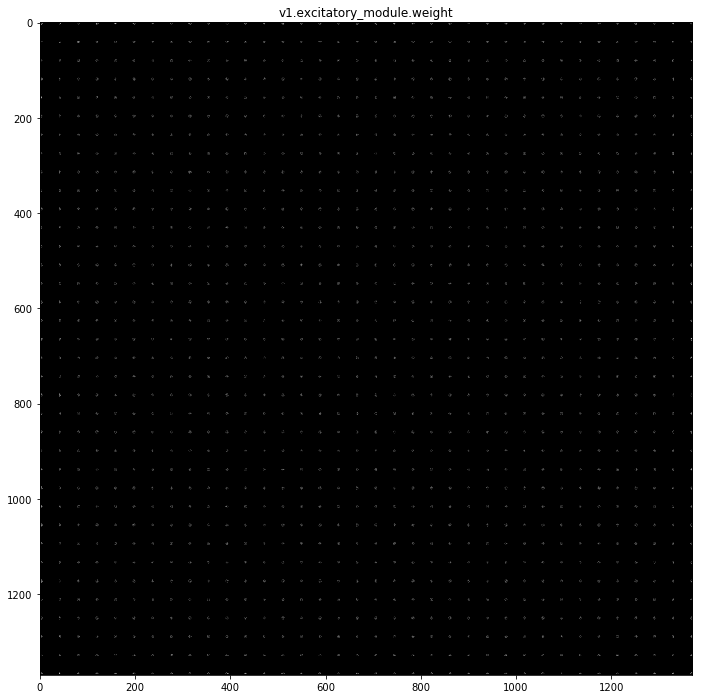

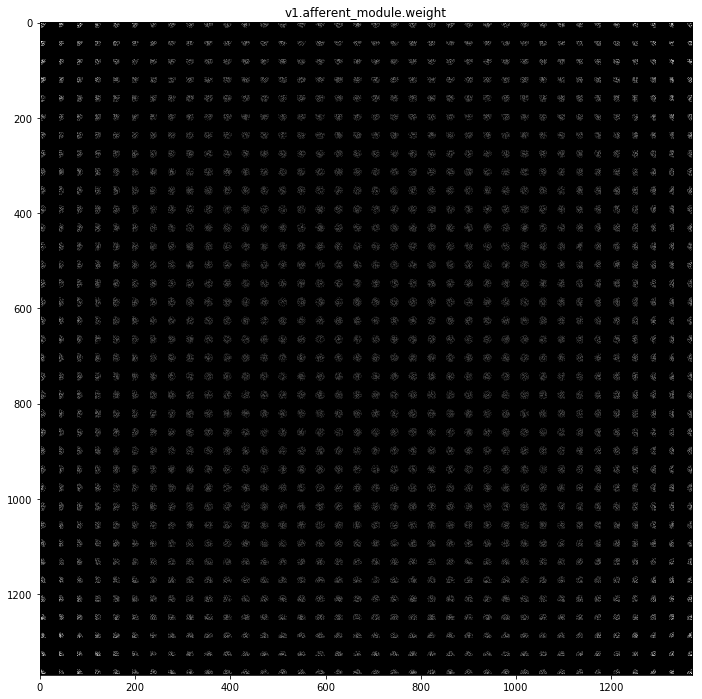

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plot_layer_weights(v1.inhibitory_module, use_range=False, prefix='v1.inhibitory_module')
plt.figure(figsize=(12, 12))
plot_layer_weights(v1.excitatory_module, use_range=False, prefix='v1.excitatory_module')
plt.figure(figsize=(12, 12))
plot_layer_weights(v1.afferent_module, use_range=False, prefix='v1.afferent_module')

In [25]:
seq.step()

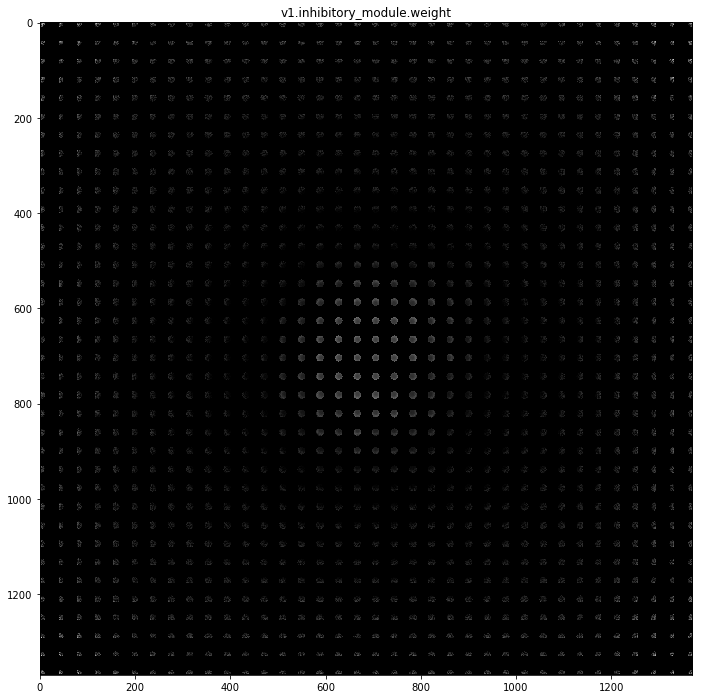

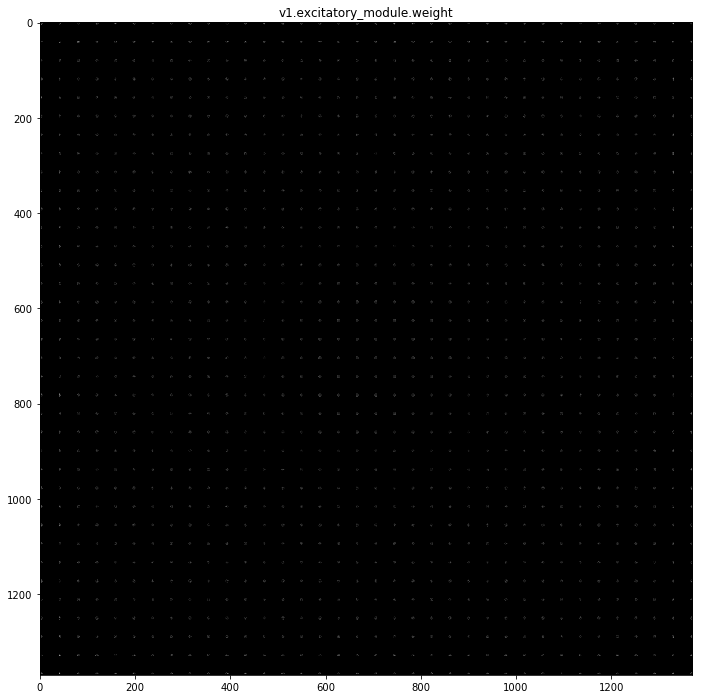

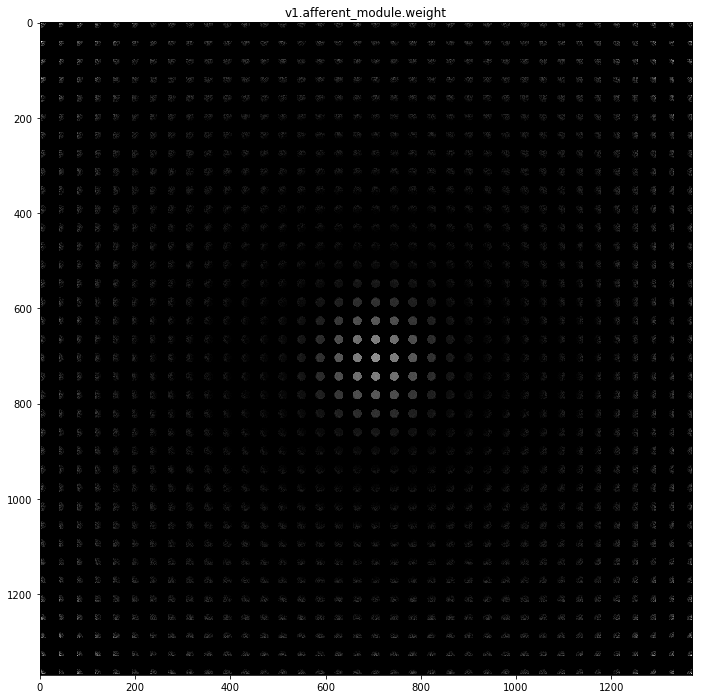

In [26]:
plt.figure(figsize=(12, 12))
plot_layer_weights(v1.inhibitory_module, use_range=False, prefix='v1.inhibitory_module')
plt.figure(figsize=(12, 12))
plot_layer_weights(v1.excitatory_module, use_range=False, prefix='v1.excitatory_module')
plt.figure(figsize=(12, 12))
plot_layer_weights(v1.afferent_module, use_range=False, prefix='v1.afferent_module')